In [ ]:
!git clone http://github.com/Zapy67/ATML-PA-4

Cloning into 'ATML-PA-4'...
remote: Enumerating objects: 153, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 153 (delta 71), reused 67 (delta 65), pack-reused 74 (from 1)
Receiving objects: 100% (153/153), 356.53 KiB | 8.91 MiB/s, done.
Resolving deltas: 100% (97/97), done.


In [30]:
!git pull http://github.com/Zapy67/ATML-PA-4

remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 4 (delta 3), reused 4 (delta 3), pack-reused 0 (from 0)
Unpacking objects: 100% (4/4), 432 bytes | 432.00 KiB/s, done.
From http://github.com/Zapy67/ATML-PA-4
 * branch            HEAD       -> FETCH_HEAD
Updating 26ba5ca..57b0ab8
Fast-forward
 fed_lib/fed_model.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


In [1]:
%cd ATML-PA-4

/kaggle/working/ATML-PA-4


In [12]:
!ls

'ATML - PA 4.pdf'   fedprox.ipynb       README.md     task4.ipynb
 data		    fedsam.ipynb        task1.ipynb
 fedgh.ipynb	    fedscaffold.ipynb   task2.ipynb
 fed_lib	    LICENSE	        task3.ipynb


#  FedSGD vs Centralized SGD (Theoretical Equivalence)

In [31]:
import torch
import torch.nn as nn

In [6]:
!pip install fedlab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.5 MB/s eta 0:

In [32]:
import fed_lib
import importlib
importlib.reload(fed_lib)

<module 'fed_lib' from '/kaggle/working/ATML-PA-4/fed_lib/__init__.py'>

In [33]:
from fed_lib import fed_methods, fed_model, utils
importlib.reload(fed_methods)
importlib.reload(fed_model)
importlib.reload(utils)

<module 'fed_lib.utils' from '/kaggle/working/ATML-PA-4/fed_lib/utils.py'>

In [34]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [35]:
client_weights = [0.2] * 5
domains = [0.2] * 5

In [39]:
fed = fed_model.Federation(num_clients=5, federate_method=fed_methods.FedSGD(client_weights=client_weights), domains=domains, partition="dirichlet", alpha=10000,device=device, batch_size=64, pin_memory=True, num_workers=2)

In [40]:
fed.train(50, lr=1e-2, verbose=False)


--- Round 1/50 ---
Training Clients
Training Client 1/5
Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 1:


FedSGD  | Test Loss: 2.2891, Test Acc: 12.18%
Central | Test Loss: 2.2877, Test Acc: 12.35%

--- Round 2/50 ---
Training Clients
Training Client 1/5
Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 2:


FedSGD  | Test Loss: 2.2553, Test Acc: 13.28%
Central | Test Loss: 2.2538, Test Acc: 13.72%

--- Round 3/50 ---
Training Clients
Training Client 1/5


Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 3:


FedSGD  | Test Loss: 2.2267, Test Acc: 14.46%
Central | Test Loss: 2.2209, Test Acc: 14.98%

--- Round 4/50 ---
Training Clients
Training Client 1/5


Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 4:


FedSGD  | Test Loss: 2.1941, Test Acc: 16.01%
Central | Test Loss: 2.1949, Test Acc: 16.17%

--- Round 5/50 ---
Training Clients
Training Client 1/5
Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 5:


FedSGD  | Test Loss: 2.1685, Test Acc: 18.00%
Central | Test Loss: 2.1662, Test Acc: 18.36%

--- Round 6/50 ---
Training Clients
Training Client 1/5


Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 6:


FedSGD  | Test Loss: 2.1454, Test Acc: 19.82%
Central | Test Loss: 2.1457, Test Acc: 19.56%

--- Round 7/50 ---
Training Clients
Training Client 1/5


Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 7:


FedSGD  | Test Loss: 2.1216, Test Acc: 21.45%
Central | Test Loss: 2.1191, Test Acc: 21.18%

--- Round 8/50 ---
Training Clients
Training Client 1/5
Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 8:


FedSGD  | Test Loss: 2.1007, Test Acc: 22.79%
Central | Test Loss: 2.0949, Test Acc: 23.24%

--- Round 9/50 ---
Training Clients
Training Client 1/5
Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 9:


FedSGD  | Test Loss: 2.0838, Test Acc: 23.88%
Central | Test Loss: 2.0792, Test Acc: 23.96%

--- Round 10/50 ---
Training Clients
Training Client 1/5
Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 10:


FedSGD  | Test Loss: 2.0623, Test Acc: 24.96%
Central | Test Loss: 2.0553, Test Acc: 25.52%

--- Round 11/50 ---
Training Clients
Training Client 1/5


Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 11:


FedSGD  | Test Loss: 2.0506, Test Acc: 25.34%
Central | Test Loss: 2.0457, Test Acc: 25.55%

--- Round 12/50 ---
Training Clients
Training Client 1/5
Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 12:


FedSGD  | Test Loss: 2.0295, Test Acc: 26.28%
Central | Test Loss: 2.0283, Test Acc: 26.45%

--- Round 13/50 ---
Training Clients
Training Client 1/5
Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 13:


FedSGD  | Test Loss: 2.0201, Test Acc: 26.56%
Central | Test Loss: 2.0197, Test Acc: 26.85%

--- Round 14/50 ---
Training Clients
Training Client 1/5
Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 14:


FedSGD  | Test Loss: 2.0031, Test Acc: 27.27%
Central | Test Loss: 1.9977, Test Acc: 27.62%

--- Round 15/50 ---
Training Clients
Training Client 1/5
Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 15:


FedSGD  | Test Loss: 1.9904, Test Acc: 27.75%
Central | Test Loss: 1.9872, Test Acc: 27.74%

--- Round 16/50 ---
Training Clients
Training Client 1/5
Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 16:


FedSGD  | Test Loss: 1.9810, Test Acc: 27.98%
Central | Test Loss: 1.9749, Test Acc: 28.45%

--- Round 17/50 ---
Training Clients
Training Client 1/5
Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 17:


FedSGD  | Test Loss: 1.9733, Test Acc: 28.20%
Central | Test Loss: 1.9607, Test Acc: 28.79%

--- Round 18/50 ---
Training Clients
Training Client 1/5
Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 18:


FedSGD  | Test Loss: 1.9588, Test Acc: 28.67%
Central | Test Loss: 1.9536, Test Acc: 29.15%

--- Round 19/50 ---
Training Clients
Training Client 1/5


Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 19:


FedSGD  | Test Loss: 1.9528, Test Acc: 28.48%
Central | Test Loss: 1.9409, Test Acc: 29.32%

--- Round 20/50 ---
Training Clients
Training Client 1/5
Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 20:


FedSGD  | Test Loss: 1.9357, Test Acc: 29.29%
Central | Test Loss: 1.9368, Test Acc: 29.53%

--- Round 21/50 ---
Training Clients
Training Client 1/5


Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 21:


FedSGD  | Test Loss: 1.9370, Test Acc: 28.90%
Central | Test Loss: 1.9268, Test Acc: 29.59%

--- Round 22/50 ---
Training Clients
Training Client 1/5
Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 22:


FedSGD  | Test Loss: 1.9242, Test Acc: 29.64%
Central | Test Loss: 1.9116, Test Acc: 30.64%

--- Round 23/50 ---
Training Clients
Training Client 1/5
Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 23:


FedSGD  | Test Loss: 1.9101, Test Acc: 30.19%
Central | Test Loss: 1.9242, Test Acc: 29.24%

--- Round 24/50 ---
Training Clients
Training Client 1/5
Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 24:


FedSGD  | Test Loss: 1.9065, Test Acc: 30.11%
Central | Test Loss: 1.9029, Test Acc: 30.39%

--- Round 25/50 ---
Training Clients
Training Client 1/5
Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 25:


FedSGD  | Test Loss: 1.8945, Test Acc: 30.74%
Central | Test Loss: 1.9022, Test Acc: 30.04%

--- Round 26/50 ---
Training Clients
Training Client 1/5
Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 26:


FedSGD  | Test Loss: 1.8897, Test Acc: 30.67%
Central | Test Loss: 1.8891, Test Acc: 30.51%

--- Round 27/50 ---
Training Clients
Training Client 1/5


Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 27:


FedSGD  | Test Loss: 1.8888, Test Acc: 30.32%
Central | Test Loss: 1.8809, Test Acc: 30.79%

--- Round 28/50 ---
Training Clients
Training Client 1/5
Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 28:


FedSGD  | Test Loss: 1.8831, Test Acc: 30.48%
Central | Test Loss: 1.8745, Test Acc: 31.13%

--- Round 29/50 ---
Training Clients
Training Client 1/5


Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 29:


FedSGD  | Test Loss: 1.8752, Test Acc: 30.80%
Central | Test Loss: 1.8676, Test Acc: 31.50%

--- Round 30/50 ---
Training Clients
Training Client 1/5
Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 30:


FedSGD  | Test Loss: 1.8667, Test Acc: 31.16%
Central | Test Loss: 1.8621, Test Acc: 31.31%

--- Round 31/50 ---
Training Clients
Training Client 1/5
Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 31:


FedSGD  | Test Loss: 1.8568, Test Acc: 31.69%
Central | Test Loss: 1.8495, Test Acc: 32.07%

--- Round 32/50 ---
Training Clients
Training Client 1/5


Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 32:


FedSGD  | Test Loss: 1.8495, Test Acc: 31.83%
Central | Test Loss: 1.8393, Test Acc: 32.45%

--- Round 33/50 ---
Training Clients
Training Client 1/5


Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 33:


FedSGD  | Test Loss: 1.8492, Test Acc: 31.81%
Central | Test Loss: 1.8406, Test Acc: 31.95%

--- Round 34/50 ---
Training Clients
Training Client 1/5


Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 34:


FedSGD  | Test Loss: 1.8473, Test Acc: 31.36%
Central | Test Loss: 1.8450, Test Acc: 31.98%

--- Round 35/50 ---
Training Clients
Training Client 1/5


Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 35:


FedSGD  | Test Loss: 1.8379, Test Acc: 32.17%
Central | Test Loss: 1.8254, Test Acc: 33.03%

--- Round 36/50 ---
Training Clients
Training Client 1/5
Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 36:


FedSGD  | Test Loss: 1.8421, Test Acc: 31.91%
Central | Test Loss: 1.8280, Test Acc: 32.85%

--- Round 37/50 ---
Training Clients
Training Client 1/5
Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 37:


FedSGD  | Test Loss: 1.8263, Test Acc: 32.66%
Central | Test Loss: 1.8338, Test Acc: 32.11%

--- Round 38/50 ---
Training Clients
Training Client 1/5
Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 38:


FedSGD  | Test Loss: 1.8231, Test Acc: 32.68%
Central | Test Loss: 1.8357, Test Acc: 32.29%

--- Round 39/50 ---
Training Clients
Training Client 1/5
Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 39:


FedSGD  | Test Loss: 1.8164, Test Acc: 33.13%
Central | Test Loss: 1.8074, Test Acc: 33.37%

--- Round 40/50 ---
Training Clients
Training Client 1/5


Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 40:


FedSGD  | Test Loss: 1.8168, Test Acc: 33.30%
Central | Test Loss: 1.8107, Test Acc: 33.64%

--- Round 41/50 ---
Training Clients
Training Client 1/5


Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 41:


FedSGD  | Test Loss: 1.8041, Test Acc: 33.88%
Central | Test Loss: 1.8014, Test Acc: 33.58%

--- Round 42/50 ---
Training Clients
Training Client 1/5
Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 42:


FedSGD  | Test Loss: 1.8060, Test Acc: 33.61%
Central | Test Loss: 1.8041, Test Acc: 33.67%

--- Round 43/50 ---
Training Clients
Training Client 1/5


Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 43:


FedSGD  | Test Loss: 1.7919, Test Acc: 34.28%
Central | Test Loss: 1.7904, Test Acc: 33.96%

--- Round 44/50 ---
Training Clients
Training Client 1/5


Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 44:


FedSGD  | Test Loss: 1.7955, Test Acc: 34.23%
Central | Test Loss: 1.7805, Test Acc: 34.39%

--- Round 45/50 ---
Training Clients
Training Client 1/5
Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 45:


FedSGD  | Test Loss: 1.7862, Test Acc: 34.44%
Central | Test Loss: 1.7834, Test Acc: 34.30%

--- Round 46/50 ---
Training Clients
Training Client 1/5
Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 46:


FedSGD  | Test Loss: 1.7834, Test Acc: 34.48%
Central | Test Loss: 1.7810, Test Acc: 34.47%

--- Round 47/50 ---
Training Clients
Training Client 1/5
Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 47:


FedSGD  | Test Loss: 1.7839, Test Acc: 34.37%
Central | Test Loss: 1.7806, Test Acc: 34.61%

--- Round 48/50 ---
Training Clients
Training Client 1/5
Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 48:


FedSGD  | Test Loss: 1.7741, Test Acc: 34.88%
Central | Test Loss: 1.7727, Test Acc: 34.89%

--- Round 49/50 ---
Training Clients
Training Client 1/5
Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 49:


FedSGD  | Test Loss: 1.7787, Test Acc: 34.71%
Central | Test Loss: 1.7556, Test Acc: 35.48%

--- Round 50/50 ---
Training Clients
Training Client 1/5
Training Client 2/5
Training Client 3/5
Training Client 4/5
Training Client 5/5
Training Server
Applying FedSGD on Server
Training Central


Evaluate on round 50:


FedSGD  | Test Loss: 1.7729, Test Acc: 35.01%
Central | Test Loss: 1.7458, Test Acc: 35.89%
Training Complete!


FedSGD  | Test Loss: 1.7729, Test Acc: 35.01%
Central | Test Loss: 1.7458, Test Acc: 35.89%
Comparing Server vs Central

Top 5 layers with largest L2 differences:
Layer                                         L2 Diff     Rel Diff
task_head.1.weight                       1.688446e-02 2.587318e-03
backbone.2.block.3.weight                1.513592e-02 2.316721e-03
backbone.1.block.3.weight                1.443887e-02 3.135130e-03
backbone.0.block.3.weight                1.436278e-02 4.380829e-03
backbone.2.block.0.weight                1.332904e-02 2.037405e-03
Overall Statistics:
Total L2 difference:        3.665112e-02
Total parameters:           551,466


In [41]:
import matplotlib.pyplot as plt
def plot_fed_vs_central_acc(metrics, title="FedSGD vs Central Test Accuracy"):
    """
    Plot FedSGD server accuracy vs Central model accuracy across rounds.

    Args:
        metrics (dict): self.round_metrics dictionary from FedSGD.
    """
    fed_acc = metrics.get('fed_test_acc', [])
    central_acc = metrics.get('central_test_acc', [])

    rounds = list(range(1, len(fed_acc) + 1))

    plt.figure(figsize=(8, 5))
    plt.plot(rounds, fed_acc, marker='o', label='FedSGD (Server) Accuracy')
    plt.plot(rounds, central_acc, marker='s', label='Central Model Accuracy')

    plt.xlabel("Round")
    plt.ylabel("Accuracy")
    plt.title(title)
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.legend()
    plt.tight_layout()
    plt.show()


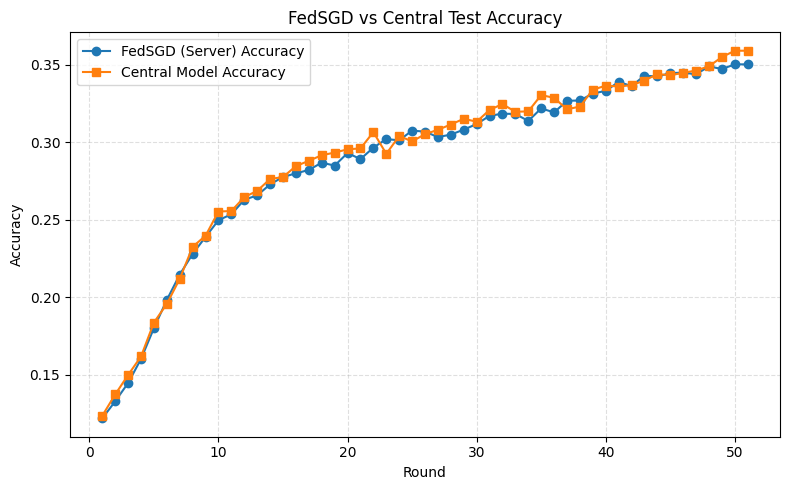

In [42]:
metrics = fed.federated_method.round_metrics

plot_fed_vs_central_acc(metrics)